In [368]:
import numpy as np
import matplotlib.pyplot as pyplot
import pyaudio
import wave
import soundfile as sf
import scipy.signal as signal
import librosa as rosa

44100


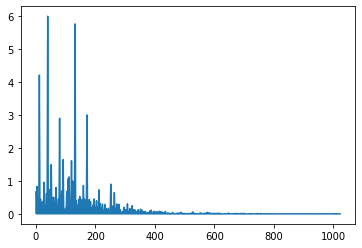

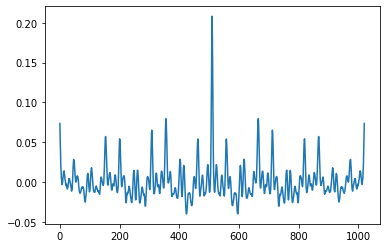

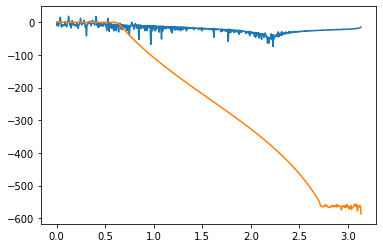

In [447]:
audio, rate = sf.read('/Users/josephcleveland/Desktop/SAX.wav')
print(rate)
spect = rosa.feature.melspectrogram(audio, sr=rate)
spect = rosa.core.stft(audio)
spect = np.mean(spect, axis=1)
spect = np.absolute(spect[0:1024])
#spect = spect[0:1024] + 0.4
spect =  spect / spect.max() * 6


freqs = rosa.core.mel_frequencies(fmax=rate)
freqs = freqs / rate
pyplot.plot(spect)
pyplot.show()

freqs = np.zeros(1024)
for i in range (0, 1024):
    freqs[i] = 1/1024 * i
b = signal.firls(1021, freqs, spect)
#b = b[0:25]
a = [1]
#freqs[freqs.shape[0] - 1] = 1
#b = signal.firwin2(127, freqs, spect)
#b = b[0:62]
#b = signal.firwin2(150, [0.0, 0.5, 1.0], [1.0, 1.0, 0.0])
#b = signal.firwin(80, 0.5, window=('kaiser', 8))
b = b / b.sum()

butter, abutter = signal.butter(24, 0.2, 'low', analog=False)

w, h = signal.freqz(b, a)
wb, hb = signal.freqz(butter, abutter)
pyplot.plot(b/a)
pyplot.show()
#b = coeffs
pyplot.plot(w, 20 * np.log10(abs(h)))
pyplot.plot(wb, 20 * np.log10(abs(hb)))
pyplot.show()

#b = butter
#a = abutter
#b =( b + butter ) * 16
#a = abutter + a
#w, h = signal.freqz(b, a)
#pyplot.plot(w, 20 * np.log10(abs(h)))
#pyplot.show()

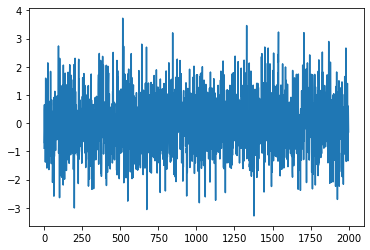

In [448]:
LENGTH = 2000
OUTSIZE = LENGTH * 1000

buffer = np.random.normal(0, 1, LENGTH)
#buffer = np.zeros(LENGTH)
#buffer[1000] = 2000
#buffer[1001] = -2000
#buffer_source = audio[40000:40000+LENGTH]*10000
#buffer = buffer_source
outs = np.zeros(OUTSIZE)
filt = np.array([0.9, 0.06, 0, 0, 0, 0, 0, 0, 0, 0, 0])
pyplot.plot(buffer)

In [449]:
zi = signal.lfilter_zi(b, a)
for out in range(0, OUTSIZE, LENGTH):
    #for i in range(0, LENGTH):

     #   avg = (buffer[i] + buffer[i - 1])/2
     #   outs[out + i] = avg * 0.96
     #   buffer[i] = avg
    outs[out:out+LENGTH] = buffer
    buffer, zi = signal.lfilter(b, a, buffer, zi=zi*buffer[0])
#outs, zi = signal.lfilter(b, a, outs, zi=zi*outs[0])

/Users/josephcleveland/Summer/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/Users/josephcleveland/Summer/venv/lib/python3.7/site-packages/scipy/signal/signaltools.py:1384: RuntimeWarning: invalid value encountered in add
  out_full[tuple(ind)] += zi


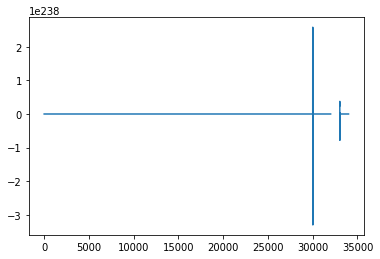

In [450]:
pyplot.plot(outs)
#pyplot.plot(outs[4000:4500])


In [439]:
outs = outs * 1000

In [442]:
p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paInt16,
                channels=1,
                rate=44100,
                output=True)

for s in range(0, OUTSIZE, LENGTH):
    stream.write(outs[s:s+LENGTH].astype('int16'))
stream.stop_stream()
stream.close()

p.terminate()

KeyboardInterrupt: 